This notebook based on this articles http://drivendata.co/blog/benchmark-cold-start-lstm-deep-learning/

In [5]:
%matplotlib inline

# plotting
import matplotlib as mpl
mpl.style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns

# math and data manipulation
import numpy as np
import pandas as pd

# to handle paths
from pathlib import Path

# set random seeds 
from numpy.random import seed
from tensorflow import set_random_seed

from csef.data import preprocessing, load_data

RANDOM_SEED = 2018
seed(RANDOM_SEED)
set_random_seed(RANDOM_SEED)

## Data loading

In [6]:
data_mapping = load_data.load_data()
consumption_train = data_mapping['consumption_train']
cold_start_test = data_mapping['cold_start_test']
submission_format = data_mapping['submission_format']
meta = data_mapping['meta']

## EDA

In [7]:
meta.head()

,surface,base_temperature,monday_is_day_off,tuesday_is_day_off,wednesday_is_day_off,thursday_is_day_off,friday_is_day_off,saturday_is_day_off,sunday_is_day_off
series_id,,,,,,,,,
100003,x-large,low,False,False,False,False,False,True,True
100004,x-large,low,False,False,False,False,False,True,True
100006,x-small,low,False,False,False,False,False,True,True
100008,x-small,low,False,False,False,False,False,True,True
100010,x-small,low,False,False,False,False,False,True,True


In [14]:
meta.shape

(1383, 9)

In [8]:
meta.isnull().values.any()

False

In [9]:
meta.isna().values.any()

False

In [10]:
meta.isnull().any().any()

False

In [17]:
meta['surface'].unique()

1383

In [18]:
consumption_train['series_id'].nunique()

758

In [22]:
meta.columns

Index(['surface', 'base_temperature', 'monday_is_day_off',
       'tuesday_is_day_off', 'wednesday_is_day_off', 'thursday_is_day_off',
       'friday_is_day_off', 'saturday_is_day_off', 'sunday_is_day_off'],
      dtype='object')

In [24]:
meta.reset_index()['series_id'].nunique()

1383

KeyboardInterrupt: 

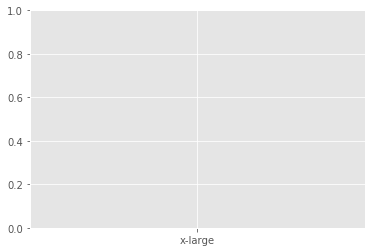

In [12]:
# plot a few consumption patterns
for col in meta.columns:
    ax = meta[col].hist()
    plt.ylabel(col)
    plt.show()

In [11]:
temp_ser_sum = pd.DataFrame([ser_data['temperature'].isna().values.sum() for _, ser_data in cold_start_test.groupby('series_id')])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbb952c518>]],
      dtype=object)

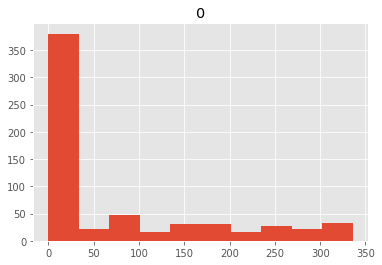

In [12]:
temp_ser_sum.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbb9ed26a0>]],
      dtype=object)

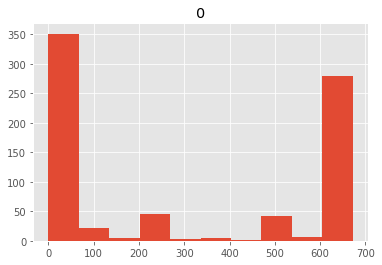

In [13]:
pd.DataFrame([ser_data['temperature'].isna().values.sum() for _, ser_data in consumption_train.groupby('series_id')]).hist()

In [14]:
cold_start_test = cold_start_test.fillna(0)
consumption_train = consumption_train.fillna(0)

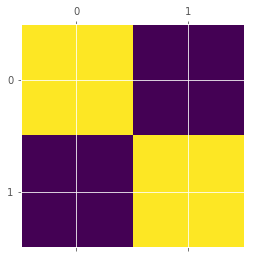

In [15]:
plt.matshow(cold_start_test[['consumption', 'temperature']].corr())

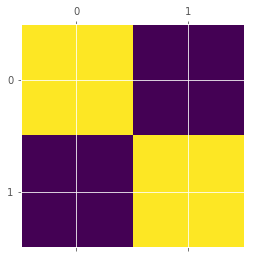

In [16]:
plt.matshow(consumption_train[['consumption', 'temperature']].corr())

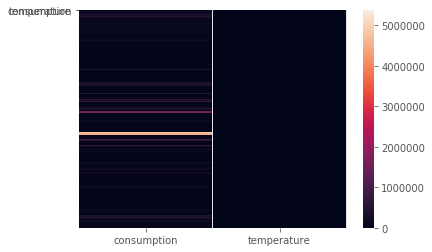

In [17]:
df = cold_start_test[['consumption', 'temperature']]
sns.heatmap(df, 
            xticklabels=df.columns.values,
            yticklabels=df.columns.values)

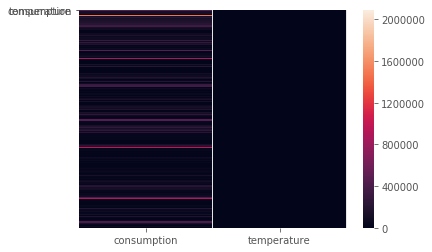

In [18]:
df = consumption_train[['consumption', 'temperature']]
sns.heatmap(df, 
            xticklabels=df.columns.values,
            yticklabels=df.columns.values)

/home/thuongdinh/.virtualenvs/mlcsef/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbb9a0bef0>,
      dtype=object)

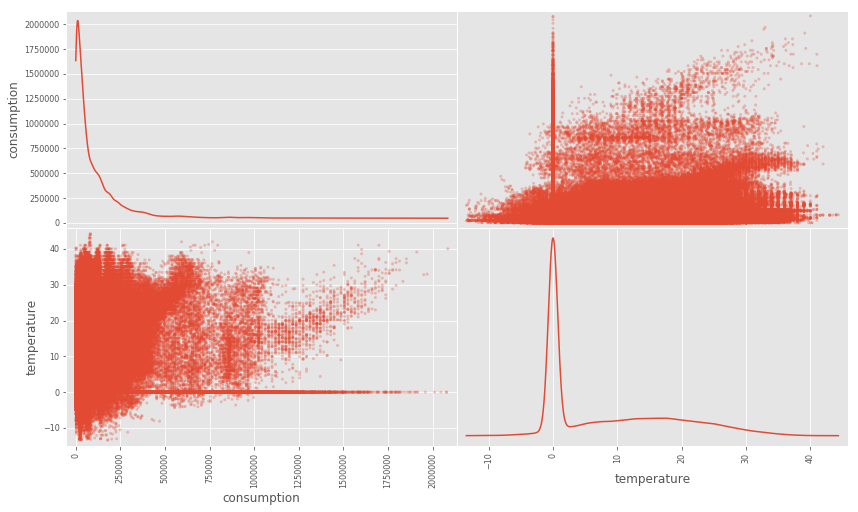

In [19]:
pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

/home/thuongdinh/.virtualenvs/mlcsef/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbb9926d68>,
      dtype=object)

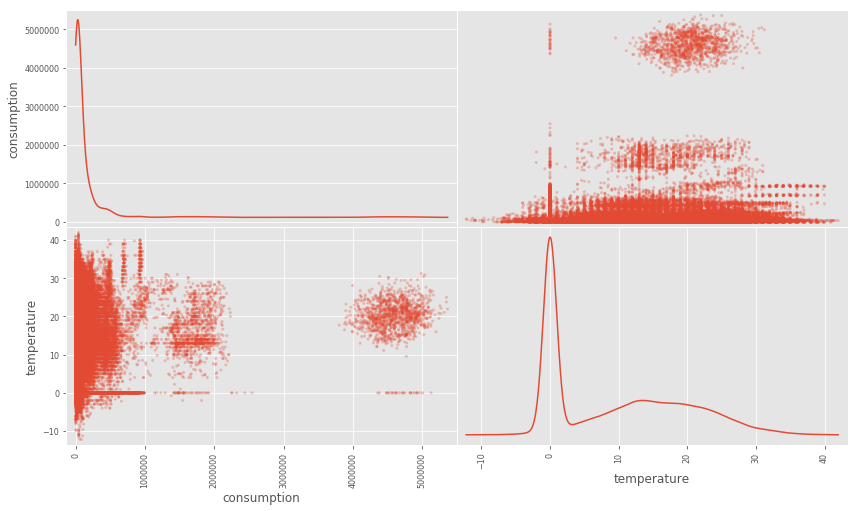

In [20]:
pd.scatter_matrix(cold_start_test[['consumption', 'temperature']], alpha = 0.3, figsize = (14,8), diagonal = 'kde')

In [22]:
rng = np.random.RandomState(seed=5425)

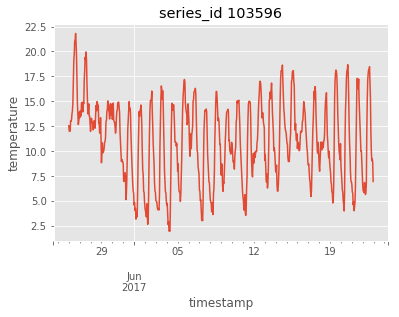

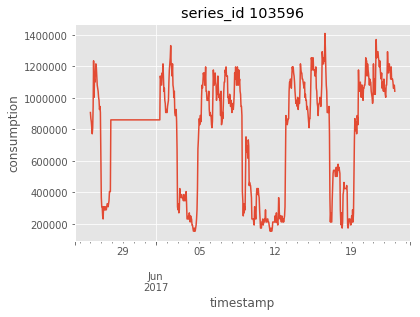

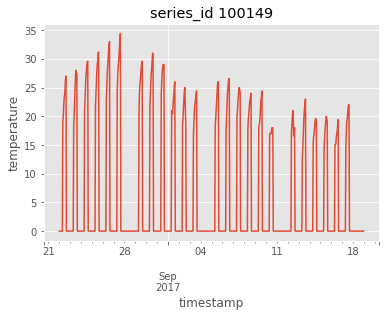

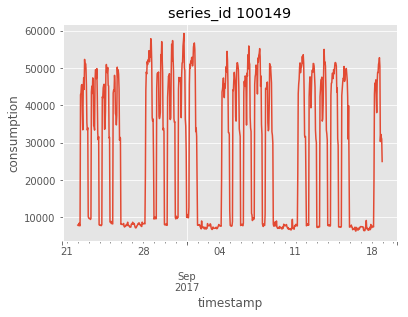

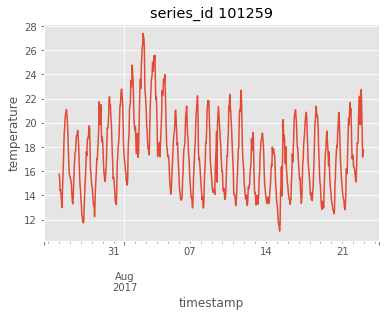

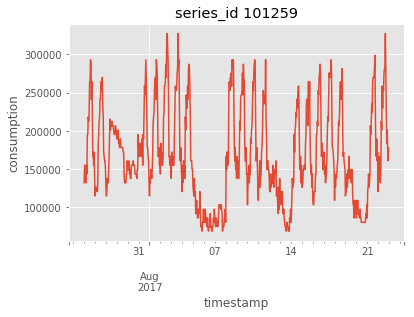

In [29]:
# plot a few consumption patterns
series_to_plot = rng.choice(consumption_train.series_id.unique(), 3)

for ser_id in series_to_plot:
    ser_data = consumption_train[consumption_train.series_id == ser_id]
    ax = ser_data.plot(x='timestamp',
                       y='temperature', 
                       title=f"series_id {int(ser_id)}",
                       legend=False)
    plt.ylabel('temperature')
    plt.show()
    
    ax = ser_data.plot(x='timestamp',
                       y='consumption', 
                       title=f"series_id {int(ser_id)}",
                       legend=False)
    plt.ylabel('consumption')
    plt.show()

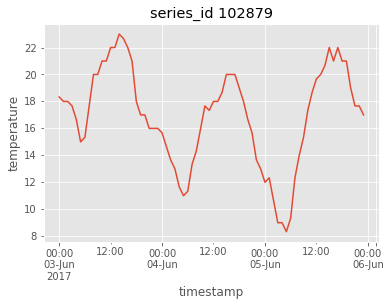

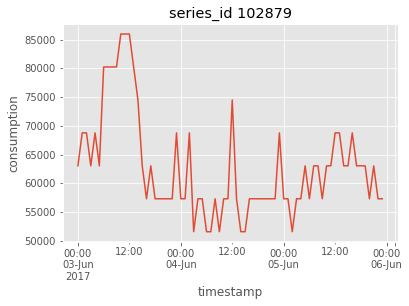

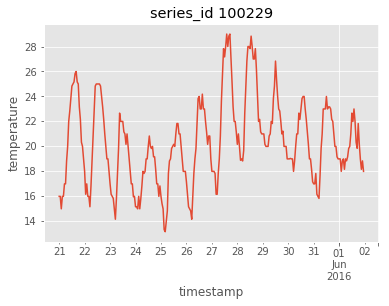

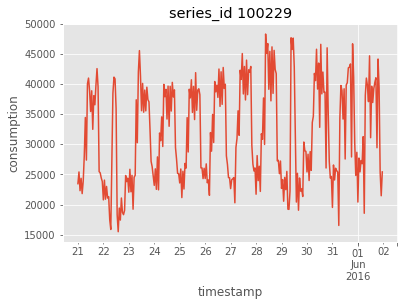

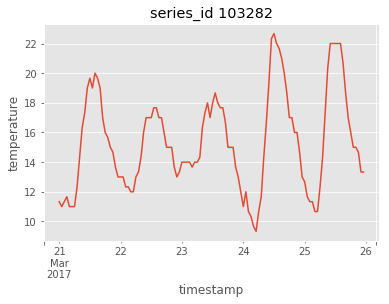

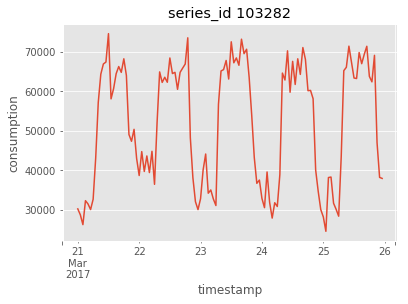

In [28]:
# plot a few consumption patterns
series_to_plot = rng.choice(cold_start_test.series_id.unique(), 3)

for ser_id in series_to_plot:
    ser_data = cold_start_test[cold_start_test.series_id == ser_id]
    ax = ser_data.plot(x='timestamp',
                       y='temperature', 
                       title=f"series_id {int(ser_id)}",
                       legend=False)
    plt.ylabel('temperature')
    plt.show()
    
    ax = ser_data.plot(x='timestamp',
                       y='consumption', 
                       title=f"series_id {int(ser_id)}",
                       legend=False)
    plt.ylabel('consumption')
    plt.show()

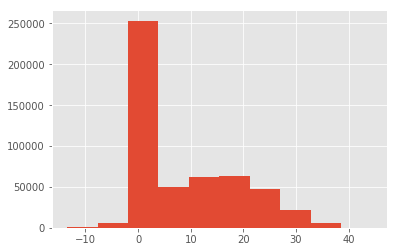

In [30]:
consumption_train.temperature.hist()

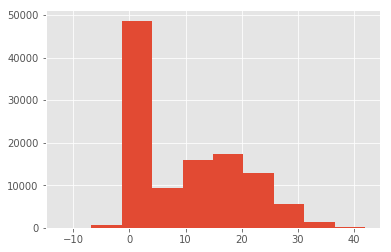

In [31]:
cold_start_test.temperature.hist()

In [33]:
cold_start_test.temperature.isna().any()

False

In [34]:
consumption_train.temperature.isna().any()

False

## Summary

 - 50% nan
 - if compare with the consumption, we can fix the zero by grouping it to the serial (get min or max or median value)
 - I have the idea about the fix the temp by regression, but not sure if it's going correct. Consider later.